<a href="https://colab.research.google.com/github/pedrofamaral/Panda-Python/blob/main/6_2_DataScience_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando dataset

In [6]:
import pandas as pd

url = 'https://raw.githubusercontent.com/malegopc/DSBD/main/Datasets/Churn/Churn_Modelling_2.csv'
df = pd.read_csv(url)

print(df.head())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00            1.0          1             1.0   
1       1   83807.86            1.0          0             1.0   
2       8  159660.80            3.0          1             0.0   
3       1       0.00            2.0          0             0.0   
4       2  125510.82            1.0          1             1.0   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

Eliminar os dados faltantes IsActiveMember e NumOfProjects

In [7]:
df = df.dropna(subset=['IsActiveMember'])
df['NumOfProducts'].fillna(df['NumOfProducts'].mean(), inplace=True)

<ipython-input-7-d861b2638778>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NumOfProducts'].fillna(df['NumOfProducts'].mean(), inplace=True)
<ipython-input-7-d861b2638778>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NumOfProducts'].fillna(df['NumOfProducts'].mean(), inplace=True)


Transformando a coluna em variavel numerica


In [8]:
X = df.iloc[:, 3:-1]

y = df['Exited']

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])

Transformar a variavel Geography em booleana


In [9]:
X = pd.get_dummies(X, columns=['Geography'], drop_first=True)

print(X.head())

   CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00            1.0          1   
1          608       0   41       1   83807.86            1.0          0   
2          502       0   42       8  159660.80            3.0          1   
3          699       0   39       1       0.00            2.0          0   
4          850       0   43       2  125510.82            1.0          1   

   IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  
0             1.0        101348.88              False            False  
1             1.0        112542.58              False             True  
2             0.0        113931.57              False            False  
3             0.0         93826.63              False            False  
4             1.0         79084.10              False             True  


Treinando e padronizando a maquina


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print ((X_train[:5], X_test[:5], y_train[:5]))

(array([[-1.83984207,  0.9057425 , -0.56453007, -0.00281772, -1.21677409,
         0.81398564,  0.63810481, -1.02638619,  1.41841046, -0.57400954,
        -0.57544863],
       [-1.92275888, -1.10406656,  1.64926218, -1.04061767,  0.57319485,
         2.53417574,  0.63810481, -1.02638619,  1.69023106,  1.74213132,
        -0.57544863],
       [ 0.58547475, -1.10406656, -0.46827823, -0.34875104, -1.21677409,
        -0.90620445,  0.63810481,  0.97429215, -0.64472159, -0.57400954,
        -0.57544863],
       [-0.43025622, -1.10406656, -1.14204109, -0.34875104,  0.1788371 ,
         0.81398564,  0.63810481, -1.02638619,  1.43183032, -0.57400954,
        -0.57544863],
       [-0.67900667,  0.9057425 ,  0.68674381,  1.03498222,  0.49400945,
        -0.90620445,  0.63810481,  0.97429215, -0.35886589,  1.74213132,
        -0.57544863]]), array([[-0.34733941,  0.9057425 , -0.17952272, -1.04061767,  1.47294555,
         0.81398564, -1.56714066,  0.97429215,  0.02068192, -0.57400954,
        -0.

Fazendo o algoritmo de regressao logistica

Acurácia da Regressão Logística:  0.8053664397276732
Matriz de Confusão Regressão Logística:
 [[1902   99]
 [ 387  109]]


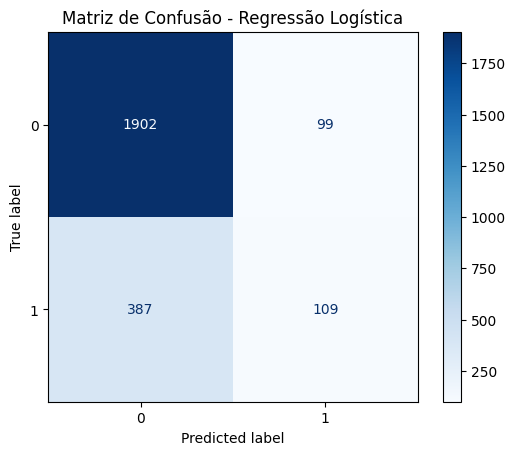

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

accLR = accuracy_score(y_test, y_pred)

print("Acurácia da Regressão Logística: ", accLR)

cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão Regressão Logística:\n", cm)

# Gráfico
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()

Fazendo o algoritmo KNN - K-Nearest Neighbors

Melhor acurácia do KNN:  0.8434120945134161 , melhor K:  17
Matriz de Confusão knn:
 [[1968   33]
 [ 368  128]]


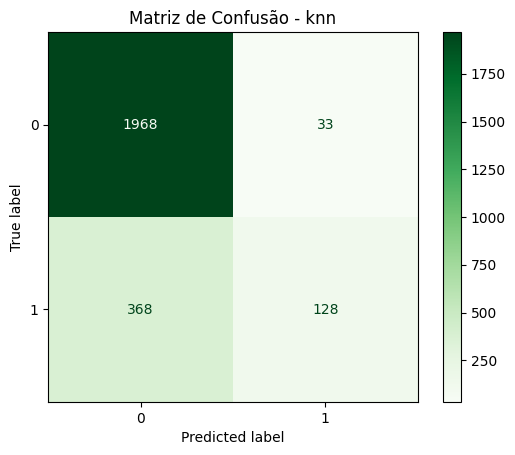

In [12]:
from sklearn.neighbors import KNeighborsClassifier


accKNN = 0
bestK = 0

for k in range(1, 31):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    y_pred = knn_model.predict(X_test)
    tempacc = accuracy_score(y_test, y_pred)
    #print(tempacc, " K : ", k)

    if accKNN < tempacc :
        accKNN = tempacc
        bestK = k


print("Melhor acurácia do KNN: ", accKNN, ", melhor K: ", bestK)

cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão knn:\n", cm)

# Gráfico
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot(cmap='Greens')
plt.title("Matriz de Confusão - knn")
plt.show()

Fazendo o algoritmo SVM - Support Vector Machines

Kernel: linear, Acurácia: 0.8014
Kernel: rbf, Acurácia: 0.8562
Kernel: poly, Acurácia: 0.8606
Kernel: sigmoid, Acurácia: 0.6996
Melhor Kernel:  poly , com Acurácia:  0.8606327593111734
Matriz de Confusão SVC:
 [[1630  371]
 [ 379  117]]


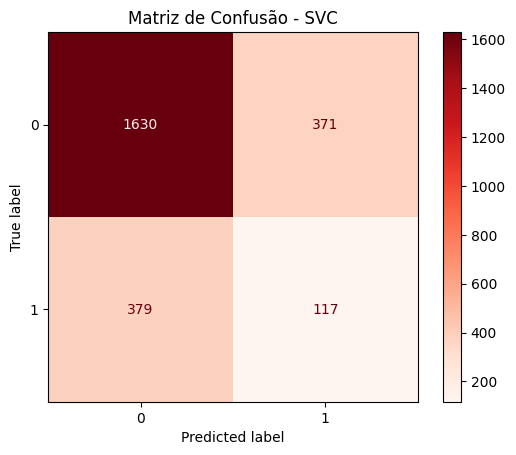

In [13]:
from sklearn.svm import SVC

kernels = ['linear', 'rbf', 'poly', 'sigmoid']
best_kernel = None
accSVC = 0

for kernel in kernels:
    svc_model = SVC(kernel=kernel)
    svc_model.fit(X_train, y_train)

    y_pred = svc_model.predict(X_test)

    tempacc = accuracy_score(y_test, y_pred)

    print(f"Kernel: {kernel}, Acurácia: {tempacc:.4f}")

    if accSVC < tempacc:
        accSVC = tempacc
        best_kernel = kernel

print("Melhor Kernel: ",best_kernel , ", com Acurácia: ", accSVC)

cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão SVC:\n", cm)

# Gráfico
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc_model.classes_)
disp.plot(cmap='Reds')
plt.title("Matriz de Confusão - SVC")
plt.show()



Fazendo o algoritmo Random Forest

Melhor número de arvores:  24 , Acurácia do Random Forest:  0.8662394873848618
Matriz de Confusão random forest:
 [[1923   78]
 [ 258  238]]


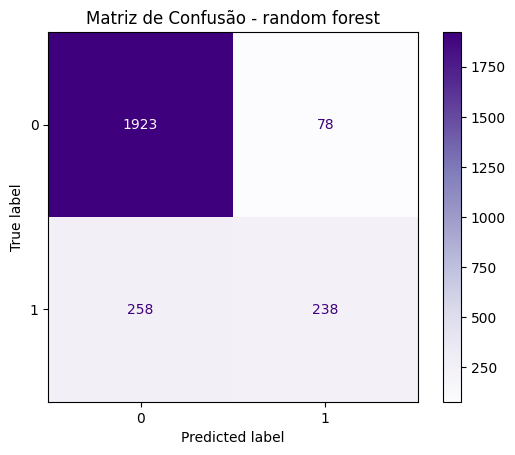

In [14]:
from sklearn.ensemble import RandomForestClassifier

best_n_tree = 0
accRF = 0

for tree in range(20, 50):

    rf_model = RandomForestClassifier(n_estimators=tree, random_state=42)
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)
    tempacc = accuracy_score(y_test, y_pred)
    #print(f"numero de arvores: {tree}, Acurácia: {tempacc:.4f}")

    if accRF < tempacc:
        accRF = tempacc
        best_n_tree = tree


print("Melhor número de arvores: ", best_n_tree, ", Acurácia do Random Forest: ", accRF)

cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão random forest:\n", cm)

# Gráfico
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='Purples')
plt.title("Matriz de Confusão - random forest")
plt.show()



Mostrando a taxa de acerto e a matriz de confusão de cada algoritmo de AM

In [15]:
print("desempenho Logistic Regression: ", accLR)
print("desempenho KNN: ", accKNN)
print("desempenho SVC: ", accSVC)
print("desempenho Random Forest: ", accRF)

max_acc = max(accLR, accKNN, accSVC, accRF)

if max_acc == accLR:
    print("Melhor desempenho: Logistic Regression com Acurácia de ", accLR)
elif max_acc == accKNN:
    print("Melhor desempenho: KNN com Acurácia de ", accKNN, "e N de ", bestK)
elif max_acc == accSVC:
    print("Melhor desempenho: SVC com Acurácia de ", accSVC, "e kernel ", best_kernel)
else:
    print("Melhor desempenho: Random Forest com Acurácia de ", accRF, "e número de arvores de", best_n_tree)


desempenho Logistic Regression:  0.8053664397276732
desempenho KNN:  0.8434120945134161
desempenho SVC:  0.8606327593111734
desempenho Random Forest:  0.8662394873848618
Melhor desempenho: Random Forest com Acurácia de  0.8662394873848618 e número de arvores de 24


Tarefa 6.2 - Redes Neurais MLP com Keras/TensorFlow: predição Churn - Churn_Modelling

In [16]:
#df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
#ja foi retirado do dataset na primeira execução
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

Criando a rede neural


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compilar o modelo
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Treinar o modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7723 - loss: 0.5259 - val_accuracy: 0.8142 - val_loss: 0.4310
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8094 - loss: 0.4522 - val_accuracy: 0.8258 - val_loss: 0.4165
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8227 - loss: 0.4236 - val_accuracy: 0.8354 - val_loss: 0.4038
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8286 - loss: 0.4153 - val_accuracy: 0.8434 - val_loss: 0.3847
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8383 - loss: 0.4019 - val_accuracy: 0.8550 - val_loss: 0.3704
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8434 - loss: 0.3862 - val_accuracy: 0.8546 - val_loss: 0.3602
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8461 - loss: 0.3767 - val_accuracy: 0.8614 - val_loss: 0.3513
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8468 - loss: 0.3709 - val_accuracy: 0.

Grafico e Matriz de confusao

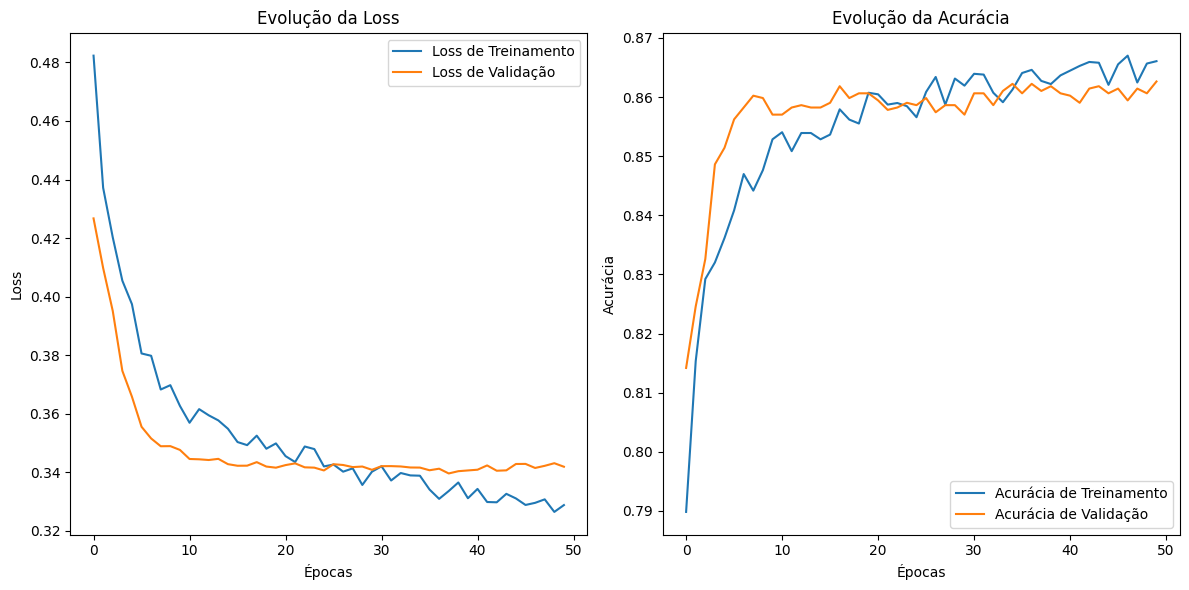

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


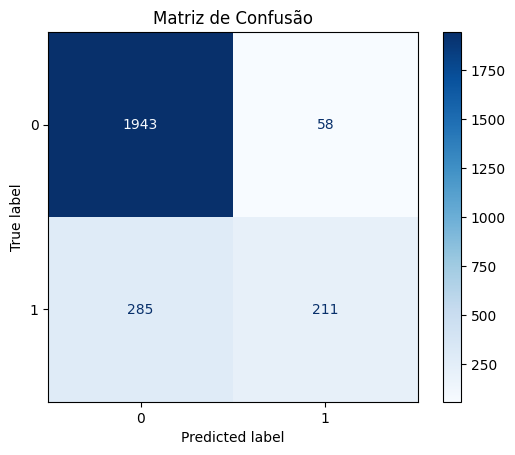

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss de Treinamento')
plt.plot(history.history['val_loss'], label='Loss de Validação')
plt.title('Evolução da Loss')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# gráfico de Acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.title('Evolução da Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()

predictions = (model.predict(X_test) > 0.5).astype(int)  # Converte probabilidades para classes

# matriz de confusão
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # Substitua pelos rótulos reais

disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()
